# Final Project

In [128]:
# Import statements
import os
import re
import nltk
import pandas as pd
import numpy as np
from afinn import Afinn
import matplotlib.pyplot as plt

In [129]:
def create_df(c):
    df = pd.DataFrame()
    divider = []
    names = []
    for f in os.listdir("tweets/%s" % c):
        try:
            dft = pd.read_csv("tweets/%s/%s" % (c, f))
            if len(divider) == 0:
                divider.append(len(dft) - 1)
            else:
                divider.append(len(dft) + divider[-1])
            df = pd.concat([df, dft])
            names.append(f[7:][:-4])
        except:
            print(f)
    return df, divider, names

In [130]:
categories = ["fast food", "airlines", "leagues", "colleges", "streaming platforms", "news", "tech giants", "celebrities"]

fast_food, ff_divider, ff_names = create_df(categories[0])
airlines, al_divider, al_names = create_df(categories[1])
leagues, lg_divider, lg_names = create_df(categories[2])
colleges, cl_divider, cl_names = create_df(categories[3])
streaming, st_divider, st_names = create_df(categories[4])
news, nw_divider, nw_names = create_df(categories[5])
tech, tg_divider, tg_names = create_df(categories[6])
celebs, cb_divider, cb_names = create_df(categories[7])


output_JLo.csv


In [131]:
stopwords = nltk.corpus.stopwords.words("english")

# Clean tweets for sentiment analysis
def get_clean_words(words):
    def _isnum(w):
        try:
            int(w)
            return True
        except ValueError:
            return False
        
    # Set words to lowercase and remove them if they are stop words
    words = [w.lower() for w in words if w.lower() not in stopwords]

    # Remove numbers
    words = [w for w in words if not _isnum(w)]
        
    # Remove hashtags
    words = [w for w in words if not w.startswith("#")]
    
    # Remove mentions
    words = [w for w in words if not w.startswith("@")]

    return words

In [132]:
def clean_tweets(tweets):
    t_new = []
    count = 0
    for t in tweets:
        try:
            w = t.split()
            w = get_clean_words(w)
            tc = " ".join(w)
            t_new.append(tc)
        except:
            count += 1
    print(count)
    print(len(t_new))
    return t_new

In [133]:
ff_tweets = list(fast_food['text'])
al_tweets = list(airlines['text'])
lg_tweets = list(leagues['text'])
cl_tweets = list(colleges['text'])
st_tweets = list(streaming['text'])
nw_tweets = list(news['text'])
tg_tweets = list(tech['text'])
cb_tweets = list(celebs['text'])

ff_clean = clean_tweets(ff_tweets)
al_clean = clean_tweets(al_tweets)
lg_clean = clean_tweets(lg_tweets)
cl_clean = clean_tweets(cl_tweets)
st_clean = clean_tweets(st_tweets)
nw_clean = clean_tweets(nw_tweets)
tg_clean = clean_tweets(tg_tweets)
cb_clean = clean_tweets(cb_tweets)

3110
96890
505
91795
476
90970
264
83212
2226
84857
140
99860
166
51921
782
63706


In [134]:
afinn = Afinn()

def get_affinity_scores(tweets):
    scores = []
    for t in tweets:
        if (len(t) > 0):
            scores.append(afinn.score(t) / len(t))
    return scores

In [135]:
ff_affin = get_affinity_scores(ff_clean)
al_affin = get_affinity_scores(al_clean)
lg_affin = get_affinity_scores(lg_clean)
cl_affin = get_affinity_scores(cl_clean)
st_affin = get_affinity_scores(st_clean)
nw_affin = get_affinity_scores(nw_clean)
tg_affin = get_affinity_scores(tg_clean)
cb_affin = get_affinity_scores(cb_clean)

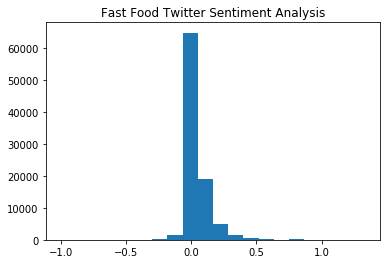

In [136]:
plt.hist(ff_affin, bins = 20)
plt.title("Fast Food Twitter Sentiment Analysis")
plt.show()

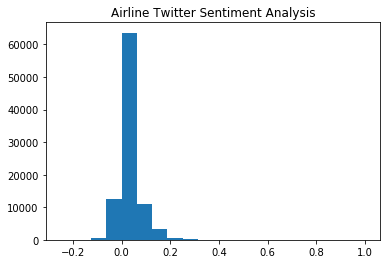

In [137]:
plt.hist(al_affin, bins = 20)
plt.title("Airline Twitter Sentiment Analysis")
plt.show()

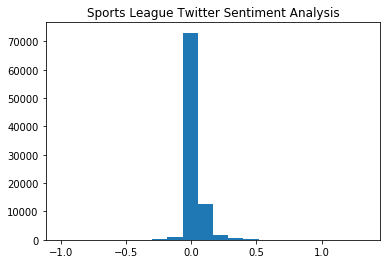

In [138]:
plt.hist(lg_affin, bins = 20)
plt.title("Sports League Twitter Sentiment Analysis")
plt.show()

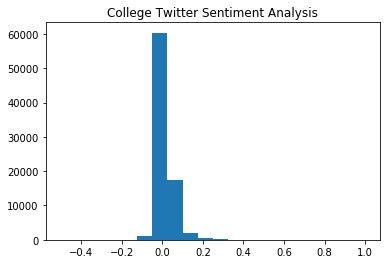

In [139]:
plt.hist(cl_affin, bins = 20)
plt.title("College Twitter Sentiment Analysis")
plt.show()

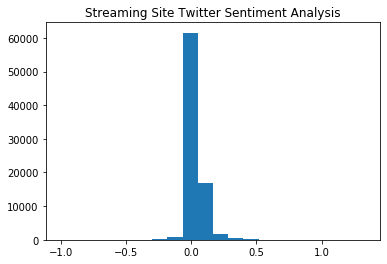

In [140]:
plt.hist(st_affin, bins = 20)
plt.title("Streaming Site Twitter Sentiment Analysis")
plt.show()

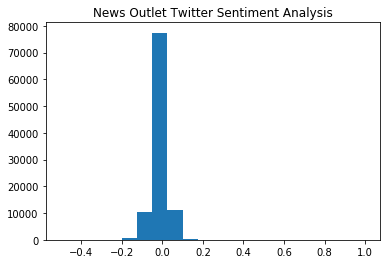

In [141]:
plt.hist(nw_affin, bins = 20)
plt.title("News Outlet Twitter Sentiment Analysis")
plt.show()

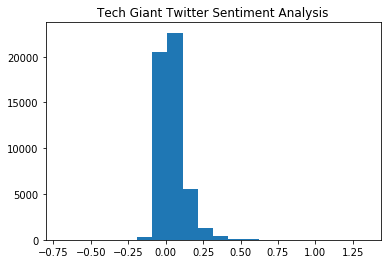

In [142]:
plt.hist(tg_affin, bins = 20)
plt.title("Tech Giant Twitter Sentiment Analysis")
plt.show()

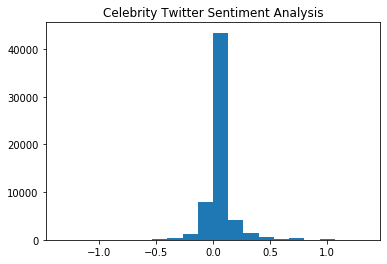

In [143]:
plt.hist(cb_affin, bins = 20)
plt.title("Celebrity Twitter Sentiment Analysis")
plt.show()

In [151]:
def affin_by_acct(tweets, divider):
    acct = []
    start = 0
    for x in range(len(divider)):
        acct.append(np.mean(get_affinity_scores(tweets[start:divider[x]])))
        start = divider[x] + 1
    return acct

In [153]:
ff_acct = affin_by_acct(ff_clean, ff_divider)
al_acct = affin_by_acct(al_clean, al_divider)
lg_acct = affin_by_acct(lg_clean, lg_divider)
cl_acct = affin_by_acct(cl_clean, cl_divider)
st_acct = affin_by_acct(st_clean, st_divider)
nw_acct = affin_by_acct(nw_clean, nw_divider)
tg_acct = affin_by_acct(tg_clean, tg_divider)
cb_acct = affin_by_acct(cb_clean, cb_divider)

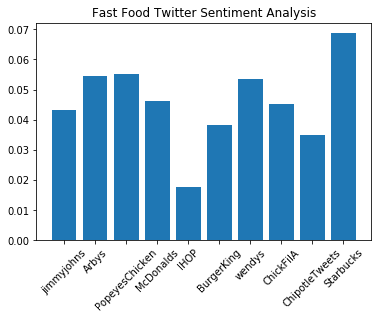

In [173]:
plt.bar(ff_names, ff_acct)
plt.title("Fast Food Twitter Sentiment Analysis")
plt.xticks(rotation=45)
plt.show()

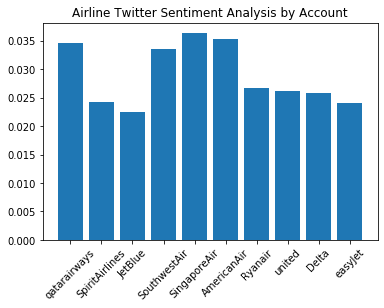

In [172]:
plt.bar(al_names, al_acct)
plt.title("Airline Twitter Sentiment Analysis by Account")
plt.xticks(rotation=45)
plt.show()

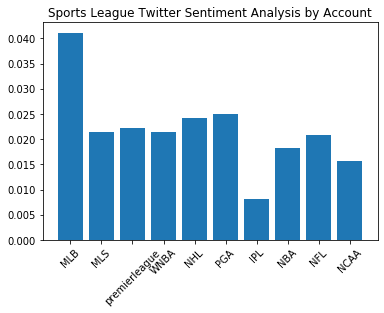

In [171]:
plt.bar(lg_names, lg_acct)
plt.title("Sports League Twitter Sentiment Analysis by Account")
plt.xticks(rotation=45)
plt.show()

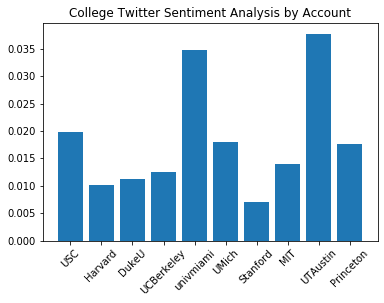

In [170]:
plt.bar(cl_names, cl_acct)
plt.title("College Twitter Sentiment Analysis by Account")
plt.xticks(rotation=45)
plt.show()

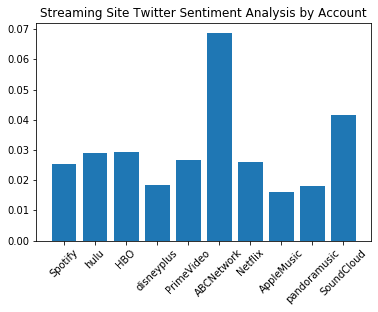

In [169]:
plt.bar(st_names, st_acct)
plt.title("Streaming Site Twitter Sentiment Analysis by Account")
plt.xticks(rotation=45)
plt.show()

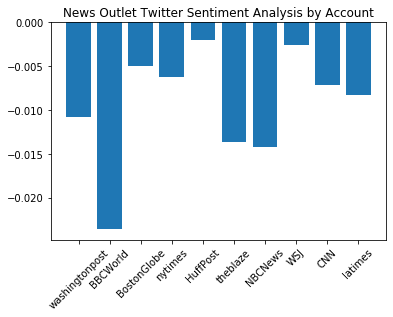

In [175]:
plt.bar(nw_names, nw_acct)
plt.title("News Outlet Twitter Sentiment Analysis by Account")
plt.xticks(rotation=45)
plt.show()

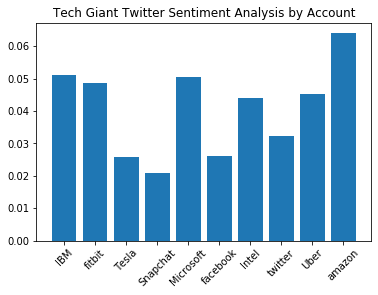

In [167]:
plt.bar(tg_names, tg_acct)
plt.title("Tech Giant Twitter Sentiment Analysis by Account")
plt.xticks(rotation=45)
plt.show()

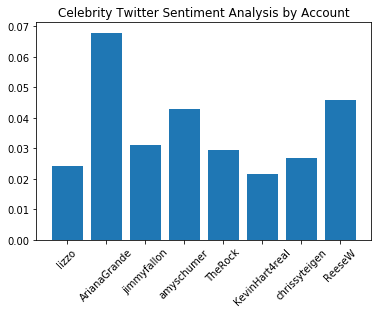

In [166]:
plt.bar(cb_names, cb_acct)
plt.title("Celebrity Twitter Sentiment Analysis by Account")
plt.xticks(rotation=45)
plt.show()